In [51]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = load_wine()
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [56]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

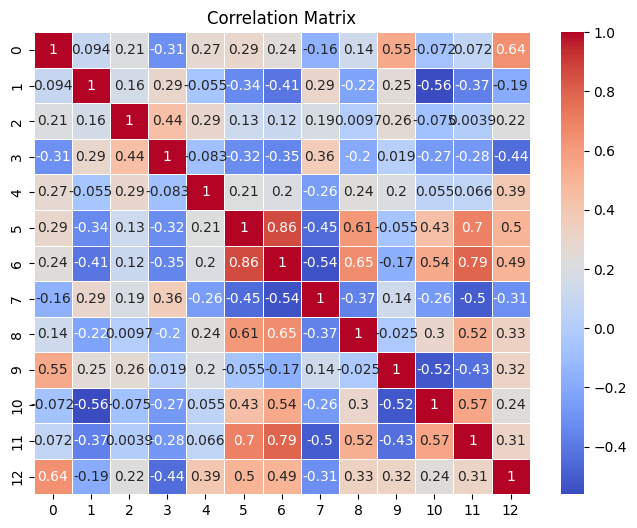

In [57]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

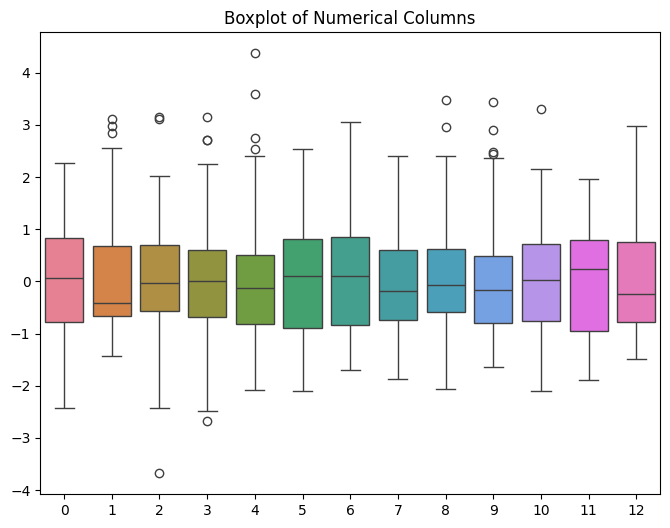

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Columns')
plt.show()

In [59]:
X = df
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

Accuracy: 0.94
R² Score: 0.76


In [76]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')
r2 = r2_score(y_test, y_pred2)
print(f'R² Score: {r2:.2f}')

Accuracy: 1.00
R² Score: 1.00


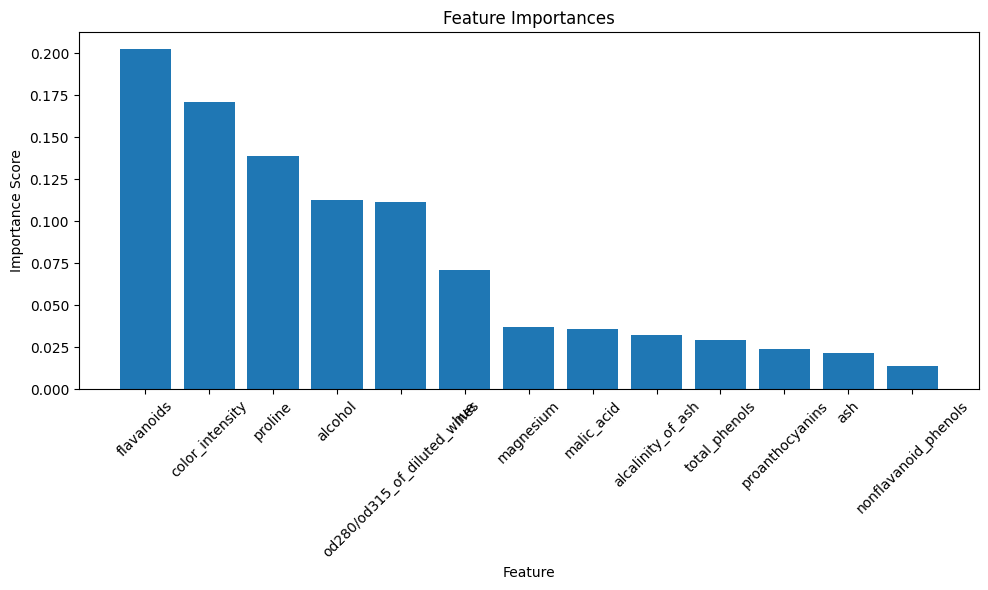

In [80]:
import numpy as np
importances = clf2.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data.feature_names[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

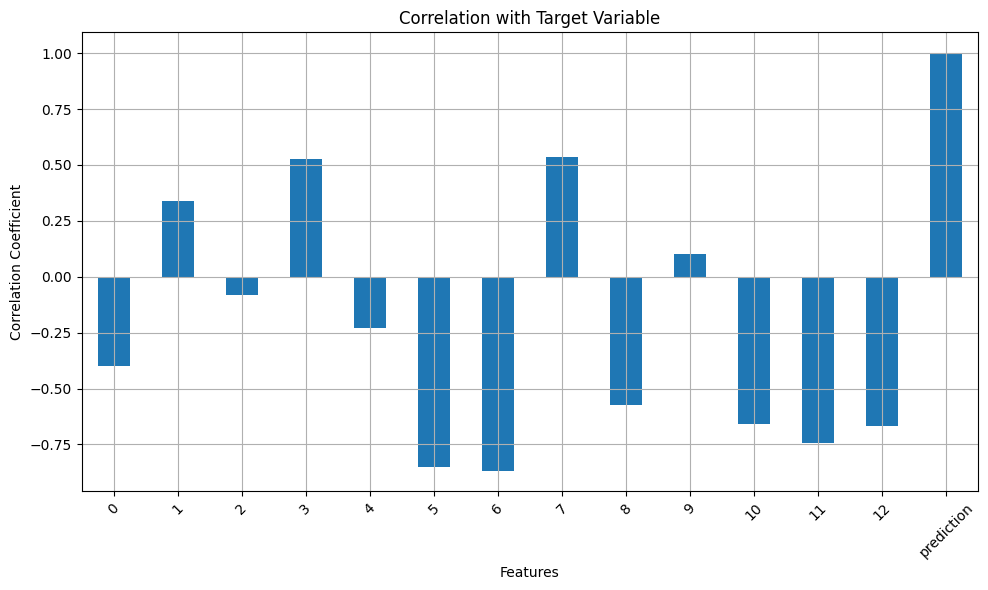

In [91]:
dfv = X_test
dfv['target'] = y_test
correlations = dfv.corr()['target'].drop('target')
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()